In [1]:
!conda install python-graphviz -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |    hcf35c78_1003         1.5 MB  conda-forge
    expat-2.2.9                |       he1b5a44_2         191 KB  conda-forge
    fontconfig-2.13.1          |    h86ecdb6_1001         340 KB  conda-forge
    fribidi-1.0.9              |       h516909a_0         113 KB  conda-forge
    gettext-0.19.8.1           |    hc5be6a0_1002         3.6 MB  conda-forge
    glib-2.64.2                |       h6f030ca_1         3.4 MB  conda-forge
    graphite2-1.3.13           |    he1b5a44_1001         102 KB  conda-forge
    graph

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
import seaborn as sns

from sklearn.model_selection import train_test_split #az adatokat ezzel válasszuk szét train és test adatokra
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #metrics for accuracy calculation

## Application of KMeans to WHOLE NETWORK

In [3]:
df=pd.read_excel('network_statistics.xlsx', sheet_name="database")
df.head(5)

ID              Label Tag  Modularity class  Degree  Weighted Degree  \
0  35             A Hang   f                 2       7                8   
1  36              A Hét   f                 0     222              362   
2  37           A Hírnök   f                 1      11               11   
3  39  A Jövő Társadalma   f                 0       6                6   
4  11   Acta Hargitensia   f                 3       1                1   

   Eccentricity  Closness centrality  Betweeness centrality  Authority  \
0             5             0.326994             130.162175   0.005730   
1             4             0.493519           52190.763846   0.220835   
2             5             0.345207             279.968792   0.009653   
3             5             0.328809              90.056678   0.004647   
4             6             0.271800               0.000000   0.000532   

        Hub  PageRanks  
0  0.005729   0.000705  
1  0.220793   0.017281  
2  0.009653   0.000945  
3  0.004647   0.000585  
4  0.000531   0.000239

In [4]:
df.columns

Index(['ID', 'Label', 'Tag', 'Modularity class', 'Degree', 'Weighted Degree',
       'Eccentricity', 'Closness centrality', 'Betweeness centrality',
       'Authority', 'Hub', 'PageRanks'],
      dtype='object')

In [5]:
d=df[['Modularity class', 'Degree', 'Weighted Degree',
       'Eccentricity', 'Closness centrality', 'Betweeness centrality',
       'Authority', 'Hub', 'PageRanks']].T.to_dict()

In [6]:
X_network=np.array([list(d[i].values()) for i in d])

In [7]:
X_network.shape

(1068, 9)

In [8]:
d=df[['ID']].T.to_dict()
y_network=np.array([list(d[i].values()) for i in d])

In [9]:
y_network.shape

(1068, 1)

In [10]:
d=df[['Label']].T.to_dict()
y_labels=np.array([list(d[i].values()) for i in d])

In [11]:
y_labels.shape

(1068, 1)

In [12]:
d=df[['Tag']].T.to_dict()
y_tags=np.array([list(d[i].values()) for i in d])

In [13]:
df['Tag'].nunique()

4

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()

In [15]:
est = KMeans(n_clusters=3)
clusters = est.fit_predict(X_network)
est.cluster_centers_.shape

(3, 9)

In [16]:
for i in range(3):
    print(est.cluster_centers_[i])

[4.91642925e+00 8.91737892e+00 1.55508072e+01 4.93542260e+00
 3.61599985e-01 4.89810861e+02 1.80919307e-02 1.80943267e-02
 7.88842355e-04]
[5.50000000e+00 3.29000000e+02 7.28000000e+02 4.00000000e+00
 5.43679500e-01 1.07033922e+05 3.45410000e-01 3.45344500e-01
 2.51950000e-02]
[2.92307692e+00 1.18307692e+02 2.56538462e+02 4.00000000e+00
 4.38491231e-01 2.21487169e+04 1.09530077e-01 1.09514538e-01
 9.15161538e-03]


In [17]:
df['clusters']=clusters

In [18]:
clusters

array([0, 2, 0, ..., 0, 0, 0], dtype=int32)

In [19]:
df.head(3)

ID     Label Tag  Modularity class  Degree  Weighted Degree  Eccentricity  \
0  35    A Hang   f                 2       7                8             5   
1  36     A Hét   f                 0     222              362             4   
2  37  A Hírnök   f                 1      11               11             5   

   Closness centrality  Betweeness centrality  Authority       Hub  PageRanks  \
0             0.326994             130.162175   0.005730  0.005729   0.000705   
1             0.493519           52190.763846   0.220835  0.220793   0.017281   
2             0.345207             279.968792   0.009653  0.009653   0.000945   

   clusters  
0         0  
1         2  
2         0

In [20]:
df.groupby('clusters').count()['Tag']

clusters
0    1053
1       2
2      13
Name: Tag, dtype: int64

In [21]:
for i in df.sort_values(by='clusters')[['clusters','Label']].T.iteritems():
    print(i[1][0], i[1][1])

0 A Hang
0 Osvát Kálmán
0 Osváth Annamária
0 Oszóczki Kálmán
0 Ötödik Évszak
0 Ötvös Béla
0 Ozsváth Anna
0 P. Jánossy Béla
0 P. Lengyel József
0 P. Papp Asztrik
0 Paál Árpád, bethlenfalvi
0 Pakocs
0 Pálfalvi Attila
0 Pálffy Antal
0 Pálffy Károly
0 Pálfi Miklós
0 Páll Árpád
0 Páll Szilárd
0 Palocsay Zsigmond
0 Palotás Dezső
0 Panek Zoltán
0 Pap Ferenc
0 Pap István
0 Papp Béla
0 Papp Ferenc
0 Papp Imre
0 Papp-Kincses Emese
0 Parajdi Incze Lajos, családi nevén Incze
0 Parászka Miklós
0 Páskándi Géza
0 Orvostudományi Értesítő
0 Pataki Jenő
0 Orvosok Lapja
0 Orosz Irén
0 Nép, A
0 Népakarat
0 Népi Egység
0 Népismereti Dolgozatok
0 Népnevelés
0 Népújság
0 Nikolits Árpád
0 Nits Árpád
0 Nyárády Erazmus Gyula
0 Nyelv- és Irodalomtudományi Közlemények
0 Nyírő József
0 Oberding József György, Ősy-Oberding
0 Oberten János
0 Oláh Béla, tokaji
0 Oláh István
0 Oláh Tibor
0 Olajos Domokos
0 Olasz Péter
0 Olosz Egon
0 Olosz Katalin
0 Olosz Lajos
0 Olosz Lajos Irodalmi Kör
0 Oltyán László
0 Orbán János D

## Application of Decision Tree to JOURNALS

In [22]:
feature_cols = list(df.columns.values[6:])[:-1]
X_network = df[feature_cols]

In [23]:
feature_cols

['Eccentricity',
 'Closness centrality',
 'Betweeness centrality',
 'Authority',
 'Hub',
 'PageRanks']

In [24]:
X_network.head()

Eccentricity  Closness centrality  Betweeness centrality  Authority  \
0             5             0.326994             130.162175   0.005730   
1             4             0.493519           52190.763846   0.220835   
2             5             0.345207             279.968792   0.009653   
3             5             0.328809              90.056678   0.004647   
4             6             0.271800               0.000000   0.000532   

        Hub  PageRanks  
0  0.005729   0.000705  
1  0.220793   0.017281  
2  0.009653   0.000945  
3  0.004647   0.000585  
4  0.000531   0.000239

In [25]:
#target vector
y = df.Degree

In [26]:
y

0         7
1       222
2        11
3         6
4         1
       ... 
1063      4
1064      3
1065      9
1066      5
1067     10
Name: Degree, Length: 1068, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_network, y, test_size=0.2, random_state=32)

In [30]:
classifier = DecisionTreeClassifier() #creating classifer object 

classifier = classifier.fit(X_train,y_train) #training

y_pred = classifier.predict(X_test) #predicting using the test dataset

In [31]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7476635514018691


In [32]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17',
                                                                                  '18','19','20','21','22','23','24','25','26','27','28','29','30','31','33','35','36',
                                                                                  '37','38','39','40','41','42','43','44','47','50','51','52','55','56','59','61','63',
                                                                                  '77','79','80','83','85','92','98','132','159','165','171','222','327','331'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('network_degree.png')
Image(graph.create_png())

/opt/conda/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.922624 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.922624 to fit



In [34]:
max_depth = 5
#creating classifer object, setting maximum depth
simpler_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)

simpler_classifier = simpler_classifier.fit(X_train,y_train) #training 

y_pred = simpler_classifier.predict(X_test) #predicting

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7149532710280374


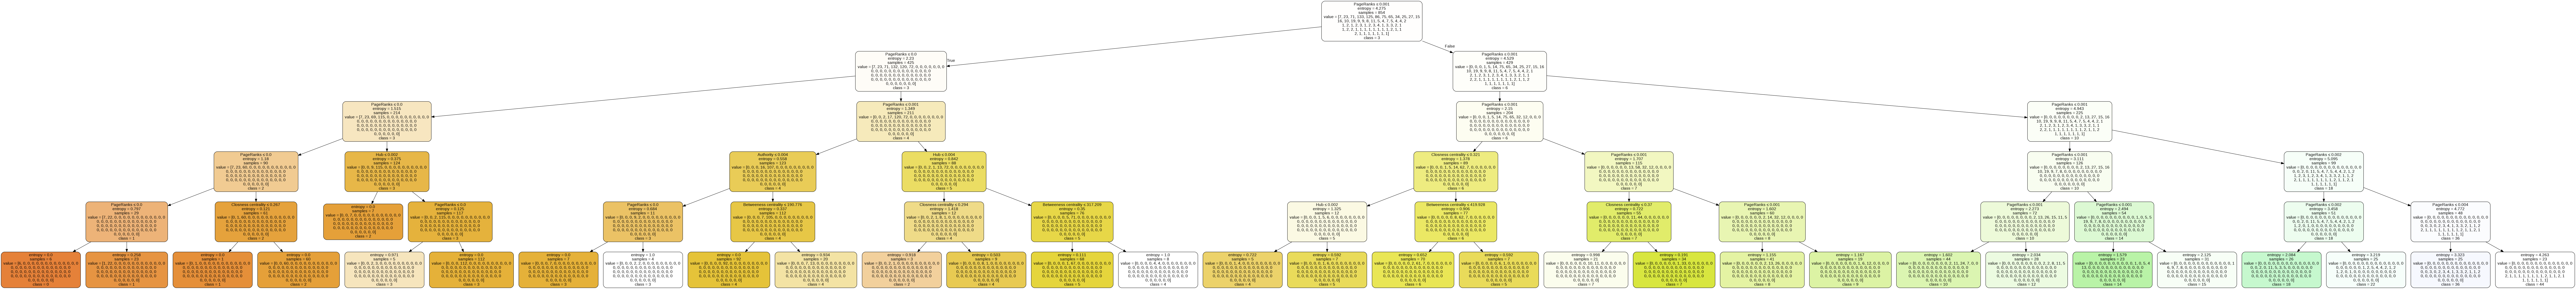

In [35]:
dot_data = StringIO()
export_graphviz(simpler_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17',
                                                                                  '18','19','20','21','22','23','24','25','26','27','28','29','30','31','33','35','36',
                                                                                  '37','38','39','40','41','42','43','44','47','50','51','52','55','56','59','61','63',
                                                                                  '77','79','80','83','85','92','98','132','159','165','171','222','327','331'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('network_maxdepth' + str(max_depth) + '.png')
Image(graph.create_png())